1139
38
      all- purpose  aluminum foil  bagels   beef  butter  cereals  cheeses  \
0             True           True   False   True    True    False    False   
1            False           True   False  False   False     True     True   
2            False          False    True  False   False     True     True   
3             True          False   False  False   False     True    False   
4             True          False   False  False   False    False    False   
...            ...            ...     ...    ...     ...      ...      ...   
1134          True          False   False   True   False     True     True   
1135         False          False   False  False   False     True     True   
1136         False          False    True   True   False    False    False   
1137          True          False   False   True   False    False     True   
1138         False          False   False  False   False    False    False   

      coffee/tea  dinner rolls  dishwashing liquid/dete

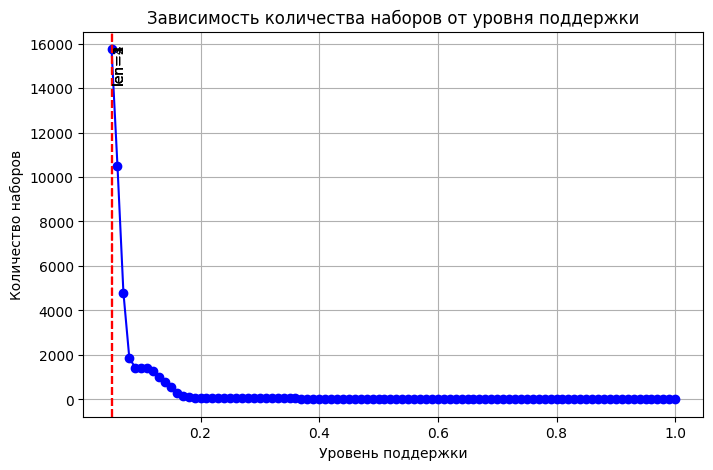


Уровни поддержки, при которых перестают генерироваться наборы:
  Наборы длиной 1 перестают генерироваться при support ≈ 0.05
  Наборы длиной 2 перестают генерироваться при support ≈ 0.05
  Наборы длиной 3 перестают генерироваться при support ≈ 0.05
  Наборы длиной 4 перестают генерироваться при support ≈ 0.05


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
all_data = pd.read_csv('dataset_group.csv',header=None)

unique_id = list(set(all_data[1]))
print(len(unique_id))

items = list(set(all_data[2]))
print(len(items))

dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in
items] for id in unique_id]

from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

print(df)

from mlxtend.frequent_patterns import apriori
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
print(results)

results = apriori(df, min_support=0.3, use_colnames=True, max_len=1)
print(results)

results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] == 2]
print(results)
print('\nCount of result itemstes = ',len(results))

# === Пункт 4: количество наборов при различных уровнях поддержки ===
supports = np.arange(0.05, 1.01, 0.01)
counts = []
len_supports = {}  # сюда запишем уровни поддержки, при которых наборы исчезают

for s in supports:
    res = apriori(df, min_support=s, use_colnames=True)
    if len(res) > 0:
        res['length'] = res['itemsets'].apply(lambda x: len(x))
        for l in sorted(set(res['length'])):
            if l not in len_supports:
                len_supports[l] = s  # первый support, где ещё есть наборы длины l
    counts.append(len(res))

# === Построение графика ===
plt.figure(figsize=(8,5))
plt.plot(supports, counts, marker='o', color='blue')
plt.title('Зависимость количества наборов от уровня поддержки')
plt.xlabel('Уровень поддержки')
plt.ylabel('Количество наборов')
plt.grid(True)

# Отмечаем уровни, где наборы исчезают
for l, s in len_supports.items():
    plt.axvline(x=s, color='red', linestyle='--')
    plt.text(s, max(counts)*0.9, f'len={l}', rotation=90, va='bottom')

plt.show()

# === Пункт 5: вывод уровней поддержки для наборов длиной 1, 2, 3, ... ===
print('\nУровни поддержки, при которых перестают генерироваться наборы:')
for l, s in sorted(len_supports.items()):
    print(f'  Наборы длиной {l} перестают генерироваться при support ≈ {s:.2f}')




1139
38
      all- purpose  aluminum foil  bagels   beef  butter  cereals  cheeses  \
0             True           True   False   True    True    False    False   
1            False           True   False  False   False     True     True   
2            False          False    True  False   False     True     True   
3             True          False   False  False   False     True    False   
4             True          False   False  False   False    False    False   
...            ...            ...     ...    ...     ...      ...      ...   
1134          True          False   False   True   False     True     True   
1135         False          False   False  False   False     True     True   
1136         False          False    True   True   False    False    False   
1137          True          False   False   True   False    False     True   
1138         False          False   False  False   False    False    False   

      coffee/tea  dinner rolls  dishwashing liquid/dete

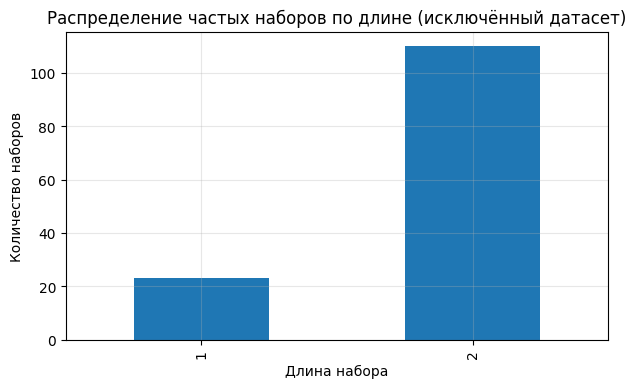


Топ-10 правил по lift:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []

Наборы, где хотя бы два элемента начинаются на 's':
      support                            itemsets  length
120  0.158911               (sandwich bags, soap)       2
122  0.150132          (shampoo, sandwich loaves)       2
123  0.158033             (soap, sandwich loaves)       2
124  0.150132  (spaghetti sauce, sandwich loaves)       2
125  0.151010                     (shampoo, soap)       2
127  0.160667             (spaghetti sauce, soap)       2
128  0.154522                       (sugar, soap)       2

Количество таких наборов: 7

Наборы, для которых уровень поддержки от 0.1 до 0.25:
      support                           itemsets  length
23   0.150132             (fruits, all- purpose)       2
24   0.153644              (juice, all- purpose)       2
25   0.154522            (ketchup, all- purpose)       2
26   0.162423  (laundry detergent, all- purpose)       2
2

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
all_data = pd.read_csv('dataset_group.csv',header=None)

unique_id = list(set(all_data[1]))
print(len(unique_id))

items = list(set(all_data[2]))
print(len(items))

dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in
items] for id in unique_id]

from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

print(df)

from mlxtend.frequent_patterns import apriori
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
print(results)

results = apriori(df, min_support=0.3, use_colnames=True, max_len=1)
print(results)

results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] == 2]
print(results)
print('\nCount of result itemstes = ',len(results))

results = apriori(df, min_support=0.38, use_colnames=True, max_len=1)
new_items = [ list(elem)[0] for elem in results['itemsets']]
new_dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in
new_items] for id in unique_id]

# === Очистка нового датасета ===
# Убираем пустые транзакции (где после фильтрации не осталось элементов)
clean_new_dataset = [t for t in new_dataset if len(t) > 0]

# Проверяем количество транзакций после очистки
print(f"Количество транзакций после фильтрации: {len(clean_new_dataset)}")

# === Преобразуем в формат DataFrame, пригодный для анализа ===
from mlxtend.preprocessing import TransactionEncoder

te_new = TransactionEncoder()
te_ary_new = te_new.fit(clean_new_dataset).transform(clean_new_dataset)
df_new = pd.DataFrame(te_ary_new, columns=te_new.columns_)

print("\nПример полученного DataFrame:")
print(df_new.head())

# === Ассоциативный анализ для нового датасета ===
from mlxtend.frequent_patterns import apriori, association_rules

# Вычисляем частые наборы для нового датасета
results_new = apriori(df_new, min_support=0.3, use_colnames=True)
results_new['length'] = results_new['itemsets'].apply(lambda x: len(x))

print("\nЧастые наборы (новый датасет):")
print(results_new)

print("\nКоличество найденных наборов:", len(results_new))

# Генерация ассоциативных правил
rules_new = association_rules(results_new, metric="confidence", min_threshold=0.6)
print("\nАссоциативные правила (новый датасет):")
print(rules_new)

# Для наглядного сравнения количества наборов
results_old = apriori(df, min_support=0.3, use_colnames=True)
results_old['length'] = results_old['itemsets'].apply(lambda x: len(x))

print("\nКоличество наборов (старый датасет):", len(results_old))
print("Количество наборов (новый датасет):", len(results_new))

# === Ассоциативный анализ для нового датасета при support = 0.15 ===
results_new_015 = apriori(df_new, min_support=0.15, use_colnames=True)
results_new_015['length'] = results_new_015['itemsets'].apply(lambda x: len(x))

# Фильтруем наборы размером больше 1 и содержащие yogurt или waffles
filtered_sets = results_new_015[
    (results_new_015['length'] > 1) &
    (results_new_015['itemsets'].apply(lambda x: 'yogurt' in x or 'waffles' in x))
]

print("\nЧастые наборы (support=0.15), содержащие 'yogurt' или 'waffles':")
print(filtered_sets)

print(f"\nКоличество таких наборов: {len(filtered_sets)}")

# === Построение датасета из элементов, которые НЕ попали в новый датасет ===

# Определяем элементы, не вошедшие в new_items
excluded_items = [item for item in items if item not in new_items]
print(f"\nКоличество исключённых элементов: {len(excluded_items)}")

# Формируем датасет из транзакций, где встречаются только исключённые товары
excluded_dataset = [
    [elem for elem in all_data[all_data[1] == id][2] if elem in excluded_items]
    for id in unique_id
]

# Удаляем пустые транзакции
excluded_dataset_clean = [t for t in excluded_dataset if len(t) > 0]
print(f"Количество транзакций с исключёнными товарами: {len(excluded_dataset_clean)}")

# === Преобразуем в DataFrame для анализа ===
te_excl = TransactionEncoder()
te_ary_excl = te_excl.fit(excluded_dataset_clean).transform(excluded_dataset_clean)
df_excluded = pd.DataFrame(te_ary_excl, columns=te_excl.columns_)

print("\nПример DataFrame по исключённым элементам:")
print(df_excluded.head())

# === Ассоциативный анализ для исключённого набора ===
results_excluded = apriori(df_excluded, min_support=0.15, use_colnames=True)
results_excluded['length'] = results_excluded['itemsets'].apply(lambda x: len(x))

print("\nЧастые наборы для исключённого датасета (support=0.15):")
print(results_excluded)

print(f"\nКоличество частых наборов (исключённый датасет): {len(results_excluded)}")

# === Проведение анализа Apriori для исключённого датасета ===

from mlxtend.frequent_patterns import apriori, association_rules

# Находим частые наборы с уровнем поддержки 0.15
results_excluded = apriori(df_excluded, min_support=0.15, use_colnames=True)
results_excluded['length'] = results_excluded['itemsets'].apply(lambda x: len(x))

print("\n=== Частые наборы (исключённый датасет, support=0.15) ===")
print(results_excluded.sort_values(by='support', ascending=False))

print(f"\nКоличество найденных наборов: {len(results_excluded)}")

# === Генерация ассоциативных правил ===
rules_excluded = association_rules(results_excluded, metric="confidence", min_threshold=0.5)

print("\n=== Ассоциативные правила (confidence >= 0.5) ===")
print(rules_excluded[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

print(f"\nКоличество найденных правил: {len(rules_excluded)}")

# === Визуализация распределения длины наборов ===
plt.figure(figsize=(7,4))
results_excluded['length'].value_counts().sort_index().plot(kind='bar')
plt.title("Распределение частых наборов по длине (исключённый датасет)")
plt.xlabel("Длина набора")
plt.ylabel("Количество наборов")
plt.grid(True, alpha=0.3)
plt.show()

# === Анализ наиболее значимых правил по lift ===
top_rules = rules_excluded.sort_values(by='lift', ascending=False).head(10)
print("\nТоп-10 правил по lift:")
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


# === Фильтрация наборов, где хотя бы два элемента начинаются на 's' ===
sets_with_s = results_excluded[
    results_excluded['itemsets'].apply(
        lambda x: sum(1 for item in x if item.startswith('s')) >= 2
    )
]

print("\nНаборы, где хотя бы два элемента начинаются на 's':")
print(sets_with_s)

print(f"\nКоличество таких наборов: {len(sets_with_s)}")


# === Фильтрация наборов по уровню поддержки от 0.1 до 0.25 ===
sets_support_range = results_excluded[
    (results_excluded['support'] >= 0.1) & (results_excluded['support'] <= 0.25)
]

print("\nНаборы, для которых уровень поддержки от 0.1 до 0.25:")
print(sets_support_range)

print(f"\nКоличество таких наборов: {len(sets_support_range)}")